In [21]:
import pandas as pd
import matplotlib_inline as plt
import seaborn as sns


In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/JulienAlardot/challenge-collecting-data/main/Data/database.csv')
len(df)

73547

In [23]:
df.head()

,Unnamed: 0,Url,Source,Locality,Type of property,Subtype of property,Price,Type of sale,Number of rooms,Area,...,Open fire,Terrace,Terrace Area,Garden,Garden Area,Surface of the land,Surface area of the plot of land,Number of facades,Swimming pool,State of the building
0,0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,319799.0,regular sale,1.0,NaN,...,0.0,1.0,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,291999.0,regular sale,1.0,NaN,...,0.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2,2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,764999.0,regular sale,2.0,153.0,...,0.0,1.0,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,NaN,660264.0,regular sale,3.0,NaN,...,0.0,1.0,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,NaN,294999.0,regular sale,2.0,80.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [24]:
old_col=(df.columns)
new_col=[]

for item in old_col:
    item =item.lower()
    item= item.replace(' ','_')
    new_col.append(item)
print(new_col)

df.columns=new_col

['unnamed:_0', 'url', 'source', 'locality', 'type_of_property', 'subtype_of_property', 'price', 'type_of_sale', 'number_of_rooms', 'area', 'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area', 'surface_of_the_land', 'surface_area_of_the_plot_of_land', 'number_of_facades', 'swimming_pool', 'state_of_the_building']


In [25]:
percentage_of_nul = (df.isnull().sum())/len(df)*100
print(len(df))
print(percentage_of_nul)


73547
unnamed:_0                           0.000000
url                                  0.000000
source                               0.000000
locality                             0.000000
type_of_property                     0.516676
subtype_of_property                 79.971991
price                                1.365113
type_of_sale                         0.000000
number_of_rooms                      1.229146
area                                15.326254
fully_equipped_kitchen               0.000000
furnished                           27.249242
open_fire                            0.000000
terrace                              0.000000
terrace_area                        68.342692
garden                               0.000000
garden_area                         85.046297
surface_of_the_land                 52.514718
surface_area_of_the_plot_of_land    52.514718
number_of_facades                   51.171360
swimming_pool                        0.000000
state_of_the_building       

In [26]:
df = (df.dropna(subset=['price']))
del df['subtype_of_property']




In [27]:
df.head()

,unnamed:_0,url,source,locality,type_of_property,price,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,...,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building
0,0,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,319799.0,regular sale,1.0,NaN,0.0,...,0.0,1.0,11.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,291999.0,regular sale,1.0,NaN,0.0,...,0.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2,2,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,764999.0,regular sale,2.0,153.0,0.0,...,0.0,1.0,62.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,3,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,2970,apartment,660264.0,regular sale,3.0,NaN,0.0,...,0.0,1.0,160.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4,4,https://www.logic-immo.be/fr/vente/appartement...,logic-immo.be,3200,apartment,294999.0,regular sale,2.0,80.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


<AxesSubplot:ylabel='price'>

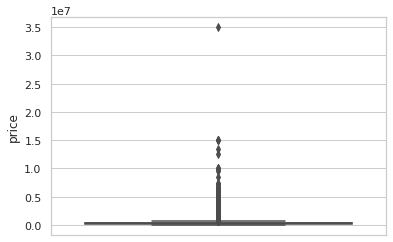

In [28]:
sns.set_theme(style='whitegrid')
sns.boxplot(data=df, y='price')

In [29]:
df.sort_values(['price'], ascending=False)
df = df.drop(df[df['price'] > 20000000].index)


<AxesSubplot:ylabel='price'>

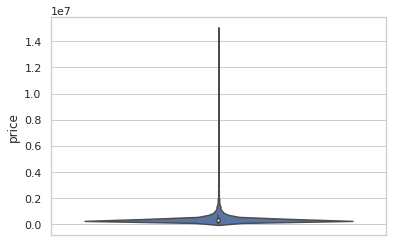

In [32]:
sns.set_theme(style='whitegrid')
sns.violinplot(data=df, y='price')

In [31]:
df.sort_values(['price'], ascending=True)

,unnamed:_0,url,source,locality,type_of_property,price,type_of_sale,number_of_rooms,area,fully_equipped_kitchen,...,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_area_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building
42102,42102,https://www.immoweb.be/fr/annonce/rez-de-chaus...,immoweb,1000,apartment,1.0,public sale,1.0,59.0,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,good
48665,48665,https://www.immoweb.be/fr/annonce/maison/a-ven...,immoweb,4470,house,2500.0,regular sale,5.0,288.0,0.0,...,1.0,1.0,50.0,1.0,1500.0,1500.0,1500.0,4.0,1.0,NaN
70109,70109,https://www.immoweb.be/fr/annonce/appartement/...,immoweb,8400,apartment,2500.0,regular sale,0.0,NaN,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,0.0,good
62099,62099,https://www.immoweb.be/fr/annonce/maison/a-ven...,immoweb,1930,house,2500.0,regular sale,4.0,142.0,0.0,...,0.0,1.0,20.0,1.0,150.0,290.0,290.0,2.0,0.0,good
62106,62106,https://www.immoweb.be/fr/annonce/immeuble-mix...,immoweb,1570,house,2500.0,regular sale,0.0,NaN,0.0,...,0.0,0.0,NaN,0.0,NaN,907.0,907.0,3.0,0.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50365,50365,https://www.immoweb.be/fr/annonce/maison/a-ven...,immoweb,1000,house,12544400.0,regular sale,20.0,NaN,0.0,...,0.0,0.0,NaN,0.0,NaN,123.0,123.0,2.0,0.0,NaN
40721,40721,https://www.immoweb.be/fr/annonce/immeuble-a-a...,immoweb,1050,house,13500000.0,regular sale,0.0,NaN,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,2.0,0.0,NaN
14015,14015,https://www.logic-immo.be/fr/vente/maisons-a-v...,logic-immo.be,7021,house,14999999.0,regular sale,70.0,10000.0,0.0,...,0.0,0.0,NaN,0.0,NaN,32767.0,32767.0,NaN,0.0,new
19178,19178,https://www.immoweb.be/fr/annonce/immeuble-a-a...,immoweb,7021,house,15000000.0,regular sale,100.0,8800.0,0.0,...,0.0,0.0,NaN,0.0,NaN,45000.0,45000.0,4.0,0.0,good


In [169]:
percentage_of_nul = (df.isnull().sum())/len(df)*100
print(len(df))
print(percentage_of_nul)


72543
unnamed:_0                           0.000000
url                                  0.000000
source                               0.000000
locality                             0.000000
type_of_property                     0.508664
price                                0.000000
type_of_sale                         0.000000
number_of_rooms                      1.097280
area                                15.138607
fully_equipped_kitchen               0.000000
furnished                           27.605696
open_fire                            0.000000
terrace                              0.000000
terrace_area                        68.001048
garden                               0.000000
garden_area                         84.960644
surface_of_the_land                 52.266931
surface_area_of_the_plot_of_land    52.266931
number_of_facades                   50.568628
swimming_pool                        0.000000
state_of_the_building               44.488097
dtype: float64


0        https://www.logic-immo.be/fr/vente/appartement...
1        https://www.logic-immo.be/fr/vente/appartement...
2        https://www.logic-immo.be/fr/vente/appartement...
3        https://www.logic-immo.be/fr/vente/appartement...
4        https://www.logic-immo.be/fr/vente/appartement...
                               ...                        
73542    https://www.immoweb.be/fr/annonce/maison/a-ven...
73543    https://www.immoweb.be/fr/annonce/maison/a-ven...
73544    https://www.immoweb.be/fr/annonce/maison/a-ven...
73545    https://www.immoweb.be/fr/annonce/maison/a-ven...
73546    https://www.immoweb.be/fr/annonce/maison/a-ven...
Name: url, Length: 73547, dtype: object

In [89]:
a= (df[df.duplicated(['url'])])
print(len(a))


0


In [39]:
b=df[df.duplicated(subset=['locality','price','number_of_rooms','garden','terrace','area'], keep=False)]
print(len(b))
b.head(50)
b.sort_values('price')
listimmoweb=b[b['source']=='immoweb']
listlogic=b[b['source']=='logic-immo.be']
listimmoclean=[]
listlogiclean=[]

        
for i in listimmoweb:
    if i['locality','price','number_of_rooms','garden','terrace','area'] in listimmoweb:
        None
    else:
        listimmoclean.append(i)
    
print(listimmoclean)




4599


TypeError: string indices must be integers

In [172]:
print('')

In [171]:
print('')

In [170]:
print( '')